In [291]:
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import pandas as pd
import numpy as np
#import datetime as dt
from itertools import cycle, islice
import matplotlib.pyplot as plt

In [308]:
tendency = 'M'

In [309]:
data = pd.read_csv("data2020/us_all.csv", date_parser="submission_date")
data["submission_date"] = pd.to_datetime(data['submission_date'], format="%m/%d/%Y")
data = data.sort_values(by="submission_date")[["submission_date", "new_case", "new_death"]].groupby("submission_date").sum()["2020-01-28":"2020-07-31"].reset_index()
emotion_us = pd.read_csv("two_weeks_usa.csv", index_col=False)
emotion_us["date"] = pd.to_datetime(emotion_us['date'])
emotion_us = emotion_us.loc[:, ~emotion_us.columns.str.contains('^Unnamed')]

In [310]:
data = data.rename({"submission_date":"date", "new_case":"cases", "new_death": "deaths"}, axis=1)
data["date"] = pd.to_datetime(data['date'])
data = data.set_index("date").resample(tendency, label='left').sum().reset_index()

In [311]:
data["cases_log"] = np.log1p(data['cases'])
data["deaths_log"] = np.log1p(data['deaths'])

In [312]:
data

,date,cases,deaths,cases_log,deaths_log
0,2019-12-31,2,0,1.098612,0.000000
1,2020-01-31,19,1,2.995732,0.693147
2,2020-02-29,185738,3601,12.132098,8.189245
3,2020-03-31,875873,58804,13.682978,10.981982
4,2020-04-30,724684,41990,13.493492,10.645211
5,2020-05-31,839071,22903,13.640052,10.039067
6,2020-06-30,1922685,25571,14.469234,10.149253


In [313]:
fig = go.Figure(data=[
    go.Scatter(name='Cases', x=data['date'], y=data['cases']),
    go.Scatter(name='Deaths', x=data['date'], y=data['deaths']),
    #go.Scatter(name='Moyenne glissante', x=df['Date'], y=df['moving_average'], fillcolor="black")
])
fig.update_layout( title='Log based weekly cases and death in United States')
fig.show()


In [314]:
#logged_emotions["date"] = pd.to_datetime(logged_emotions['date'])

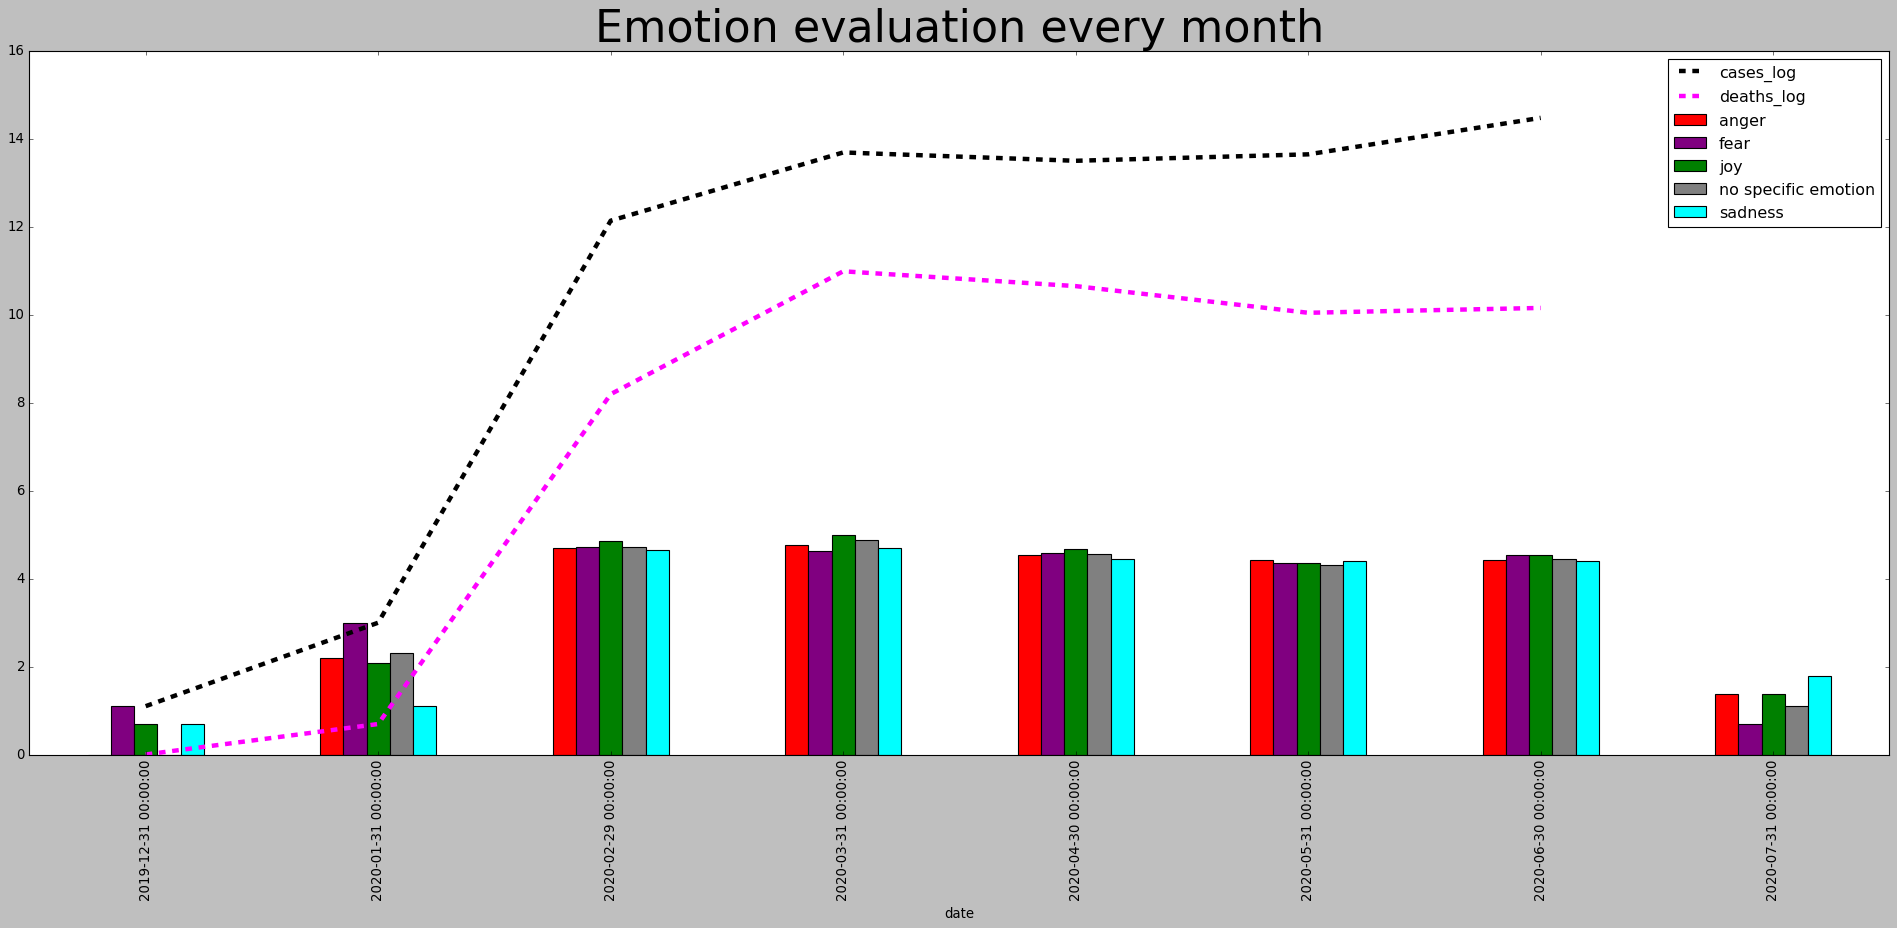

In [317]:
plt.style.use('classic')
plt.rcParams['lines.linestyle'] = '--'
fig, ax = plt.subplots(1, 1)
data.plot(kind="line", y="cases_log", ax=ax, color='black',linewidth=4)
data.plot(kind="line", y="deaths_log", ax=ax, color='magenta',linewidth=4)

resampled_emotions = emotion_us.resample(tendency, closed='left', label='left', on="date").sum()
logged_emotions = np.log1p(resampled_emotions[resampled_emotions.columns])
my_colors = list(islice(cycle(['red', 'purple', 'green', 'gray', 'cyan']), None, len(logged_emotions)))
plot = logged_emotions.plot(kind="bar", figsize=(30,11), 
                     title="Emotion evaluation every month", 
                     fontsize=12, ax=ax, color=my_colors).title.set_size(40)


In [316]:
data

,date,cases,deaths,cases_log,deaths_log
0,2019-12-31,2,0,1.098612,0.000000
1,2020-01-31,19,1,2.995732,0.693147
2,2020-02-29,185738,3601,12.132098,8.189245
3,2020-03-31,875873,58804,13.682978,10.981982
4,2020-04-30,724684,41990,13.493492,10.645211
5,2020-05-31,839071,22903,13.640052,10.039067
6,2020-06-30,1922685,25571,14.469234,10.149253


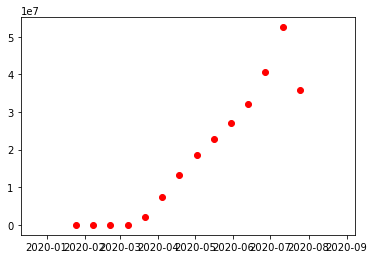

In [40]:
plot = plt.scatter(x=data["date"], y=data['cases'], c='r')
plt.show()

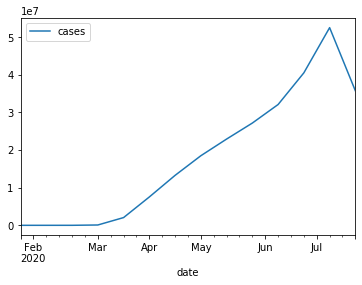

In [50]:
data.plot(x="date", y="cases")

In [64]:
data.date.max()

Timestamp('2020-07-18 00:00:00')

In [65]:
data.date.min()

Timestamp('2020-01-18 00:00:00')

In [66]:
emotion_us.date.max()

Timestamp('2020-07-31 00:00:00')

In [67]:
emotion_us.date.min()

Timestamp('2020-01-28 00:00:00')